In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
csv = pd.read_csv("PLOTS - Sheet8.csv")
csv2 = pd.read_csv("PLOTS - Sheet9.csv")
csv3 = pd.read_csv("PLOTS - Sheet15b.csv")

In [4]:
csv3

,FLOPS,MAP@10
0,34,5.3232
1,67,8.6365
2,134,11.3562
3,269,13.3767
4,538,14.7650
5,1076,15.6585
6,2151,16.2905
7,4303,16.7648
8,8606,17.2018


In [5]:
tableau_20 = [
"k",
"tab:orange",
"tab:red",
"tab:green",
"tab:purple",
"tab:brown",
"tab:pink",
"tab:gray",
"tab:olive",
"tab:cyan"
]


In [6]:
import matplotlib

cmap = matplotlib.cm.get_cmap('BuPu')

rgba = [cmap(i) for i in np.linspace(0.1, 1.0, 9)]

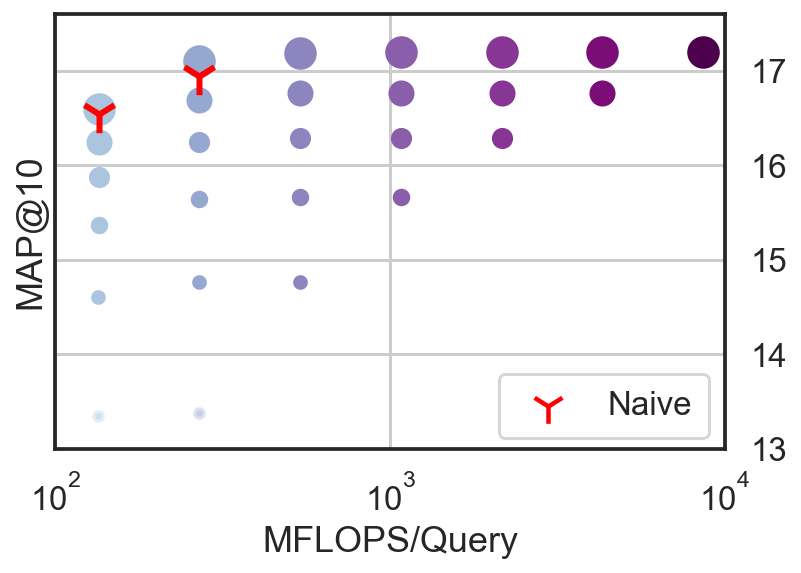

In [7]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

sns.set_context('talk')
sns.set_style("white")
plt.ylim([13, 17.6])
plt.xlim([100, 10000])

markers = ['o', '^', 'v', 'h', '+', 'x', 'p', '*', 'D']
c=-1
for i in range(9):
    cmap = rgba[i]
    for j in range(i, 9):
        c+=1      
        m = markers[j]
        alpha=np.exp((csv["MAP@10"][c]-9))/(np.exp(5.5))
        if csv["MAP@10"][c]>14.1:
            alpha=0.8
        if csv["MAP@10"][c]>14.3:
            alpha=1
        plt.scatter(csv["MFLOPS"][c],
                    csv["MAP@10"][c],
                    marker='o',
                    linewidth=3,
                    linestyle='-',
                    zorder=30, color=cmap, alpha=alpha, sizes=[1.75**j*2])

# fs=40
# plt.yticks(fontsize=fs)
# plt.xticks(fontsize=fs)

plt.xscale("log")
plt.xlabel("MFLOPS/Query")
plt.ylabel("MAP@10")

plt.grid()

for c in range(len(csv2["MFLOPS"])):
    plt.scatter(csv2["MFLOPS"][c], csv2["MAP@10"][c], marker='1', zorder=30, sizes=[350], c='r', linewidth=3)

for i in range(9):
    plt.scatter([], [],  marker='o', label=f"{2**(i+3)}", c='steelblue', sizes=[1.75**i*2])

# legend1 = plt.legend(loc=1, borderpad=0.2, bbox_to_anchor=(1.51, 1.04),title="$D_{r}$", prop={'size':15})
# plt.gca().add_artist(legend1)

foo=[]; lab=[f"{2**(i+3)}" for i in range(9)]
for i in range(9):
    foo.append(plt.scatter([], [],  marker="s", color=rgba[i]))
    
# legend2 = plt.legend(foo, lab, loc=1, borderpad=0.2, bbox_to_anchor=(1.267, 1.04), title="$D_{s}$", prop={'size':15})    
# title = legend2.get_title()
# title.set_fontsize('x-large')
# plt.gca().add_artist(legend2)

foo=[]; lab=["Naive"]
foo.append(plt.scatter([], [],  marker="1", c="r",  sizes=[300]))
legend2 = plt.legend(foo, lab, loc=1, borderpad=0.5, bbox_to_anchor=(1, 0.21))    


# plt.gca().add_artist(legend2)
plt.savefig("MAP_4K.pdf", bbox_inches="tight")

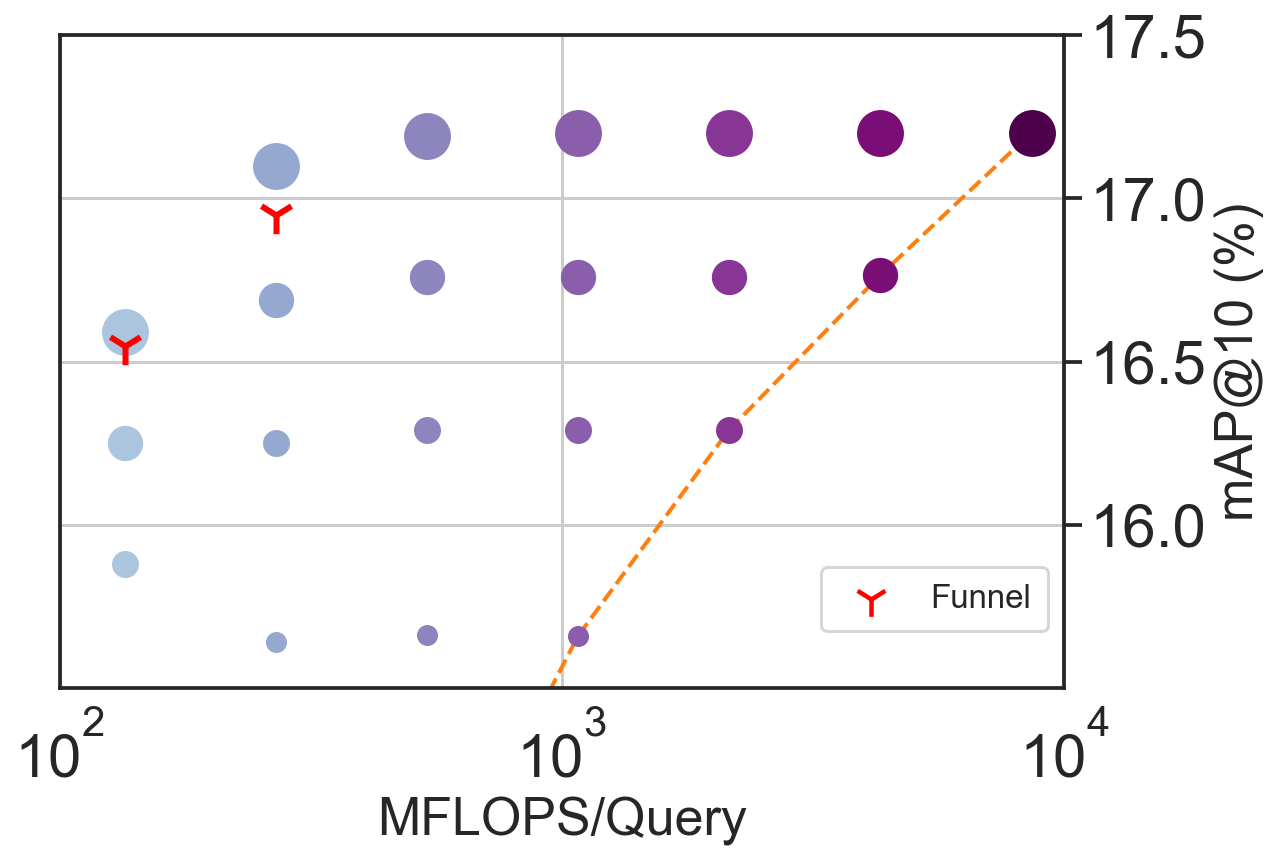

In [12]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
# f, ax = plt.subplots(figsize=(16, 12))
f, ax = plt.subplots(figsize=(9, 6))
sns.set_context('talk')
sns.set_style("white")
ax.set_ylim([15.5, 17.4])
ax.set_xlim([100, 10000])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
markers = ['o', '^', 'v', 'h', '+', 'x', 'p', '*', 'D']

c=-1
for i in range(9):
    cmap = rgba[i]
    for j in range(i, 9):
        c+=1      
        m = markers[j]
        alpha=np.exp((csv["MAP@10"][c]-9))/(np.exp(5.5))
        if csv["MAP@10"][c]>14.1:
            alpha=0.8
        if csv["MAP@10"][c]>14.2:
            alpha=1
        plt.scatter(csv["MFLOPS"][c],
                    csv["MAP@10"][c],
                    marker='o',
                    linewidth=3,
                    linestyle='-',
                    zorder=30, color=cmap, alpha=alpha, sizes=[1.95**j*2])

fs=30
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
plt.xscale("log")
plt.xlabel("MFLOPS/Query", fontsize=26)
plt.ylabel("mAP@10 (%)", fontsize=26)
plt.yticks([16.0, 16.5, 17.0, 17.5])
plt.grid()

plt.plot(csv3["FLOPS"], csv3["MAP@10"], linewidth=2, linestyle="--", color="tab:orange")

for c in range(len(csv2["MFLOPS"])):
    plt.scatter(csv2["MFLOPS"][c], csv2["MAP@10"][c], marker='1', zorder=30, sizes=[350], c='r', linewidth=3)

for i in range(9):
    plt.scatter([], [],  marker='o', label=f"{2**(i+3)}", c='steelblue', sizes=[1.75**i*2])

# legend1 = plt.legend(loc=1, borderpad=0.2, bbox_to_anchor=(1.57, 1.03),title="$D_{r}$", prop={'size':15})
# plt.gca().add_artist(legend1)

foo=[]; lab=[f"{2**(i+3)}" for i in range(9)]
for i in range(9):
    foo.append(plt.scatter([], [],  marker="o", color=rgba[i]))
    
# legend2 = plt.legend(foo, lab, loc=1, borderpad=0.2, bbox_to_anchor=(1.4, 1.03), title="$D_{s}$", prop={'size':15})    
title = legend2.get_title()
title.set_fontsize('x-large')
# plt.gca().add_artist(legend2)

foo=[]; lab=["Funnel"]
foo.append(plt.scatter([], [],  marker="1", c="r", sizes=[300]))
legend2 = plt.legend(foo, lab, loc=1, borderpad=0.5, bbox_to_anchor=(1, 0.21))    


# plt.gca().add_artist(legend2)
plt.savefig("MAP_4K.pdf", bbox_inches="tight")